데이터 불러오기

In [1]:
import pandas as pd

ss_stock = pd.read_csv("D:/_data/stock predict/삼성전자.csv", thousands=',', encoding='CP949')
ku_stock = pd.read_csv("D:/_data/stock predict/키움증권.csv", thousands=',', encoding='CP949')

print(ss_stock.shape, ku_stock.shape)

(1120, 17) (1060, 17)


In [2]:
ss_stock = ss_stock.drop(range(893,1120), axis=0)
ss_stock

,일자,시가,고가,저가,종가,전일비,Unnamed: 6,등락률,거래량,금액(백만),신용비,개인,기관,외인(수량),외국계,프로그램,외인비
0,2021/12/17,76800,78000,76800,78000,▲,200,0.26,11802494.0,914987.0,0.00,-733323,-907696,0,-257019,757837,51.78
1,2021/12/16,78500,78500,77400,77800,▲,200,0.26,11996128.0,934244.0,0.13,-442445,-261746,-105777,571543,822030,51.78
2,2021/12/15,76400,77600,76300,77600,▲,600,0.78,9584939.0,738592.0,0.14,-1118059,-654764,1095947,1946258,1706254,51.79
3,2021/12/14,76500,77200,76200,77000,▲,200,0.26,10976660.0,841447.0,0.14,198293,-1487295,1005909,804186,-132070,51.77
4,2021/12/13,77200,78300,76500,76800,▼,-100,-0.13,15038750.0,1163285.0,0.13,-181359,184966,-151301,-1388477,-606534,51.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,2018/05/11,52000,52200,51200,51300,▼,-300,-0.58,10314997.0,533765.0,0.11,-45114,-495810,213378,-689886,847176,52.77
889,2018/05/10,51700,51700,50600,51600,▲,700,1.38,13905263.0,712206.0,0.11,454294,224160,-1013639,-864212,-721609,52.77
890,2018/05/09,52600,52800,50900,50900,▼,-1700,-3.23,16128305.0,831372.0,0.12,3312625,-1198028,-1598061,-2091271,-663462,52.78
891,2018/05/08,52600,53200,51900,52600,▲,700,1.35,23104720.0,1218273.0,0.13,-957475,-1049663,1451667,2726501,-1441124,52.81


In [3]:
ku_stock = ku_stock.drop(range(893,1060), axis=0)
ku_stock

,일자,시가,고가,저가,종가,전일비,Unnamed: 6,등락률,거래량,금액(백만),신용비,개인,기관,외인(수량),외국계,프로그램,외인비
0,2021/12/17,107000,109500,106500,109500,▲,2000,1.86,60487,6576,0.00,-16202,6443,0,7348,8805,25.45
1,2021/12/16,109500,109500,107000,107500,,0,0.00,45031,4858,0.82,956,13405,-23661,-10182,-12948,25.45
2,2021/12/15,107000,108000,106500,107500,▲,500,0.47,23210,2496,0.81,-4089,1368,-915,5065,-1671,25.54
3,2021/12/14,106500,109000,106500,107000,▼,-500,-0.47,64977,6974,0.83,4777,-20135,15033,-1107,2477,25.54
4,2021/12/13,107000,109500,107000,107500,▲,1000,0.94,52503,5695,0.83,-13963,7746,7576,695,8305,25.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,2018/05/11,122500,129500,121500,123000,▲,3000,2.50,205885,25797,0.32,-5731,17000,-15068,22364,42506,19.21
889,2018/05/10,119000,122500,118500,120000,▲,4000,3.45,160660,19348,0.30,-11827,50258,-37975,15167,34692,19.28
890,2018/05/09,118000,120000,114000,116000,▼,-2000,-1.69,151419,17576,0.29,16826,-32266,15686,7141,9642,19.45
891,2018/05/08,124000,125000,118000,118000,▼,-4000,-3.28,124369,15226,0.34,7779,31463,-39014,-3018,-17439,19.38


데이터 전처리

In [4]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 삼성증권 데이터 전처리

x1 = ss_stock.drop(columns=['일자', '종가', '전일비', '거래량', 'Unnamed: 6', '등락률', '금액(백만)', '개인', '기관', '외인(수량)', '외국계', '프로그램', '외인비'], axis=1)
y1 = ss_stock['종가']

x1 = x1.to_numpy()

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.8, random_state=1)
x1_test, x1_val, y1_test, y1_val = train_test_split(x1_test, y1_test, train_size=0.7, random_state=1)

x1_train.shape, x1_test.shape, x1_val.shape

((714, 4), (125, 4), (54, 4))

In [6]:
# 삼성 스케일러 적용
scaler = MinMaxScaler()
x1_train = scaler.fit_transform(x1_train)
x1_test = scaler.fit_transform(x1_test)
x1_val = scaler.fit_transform(x1_val)

In [7]:
x1_train = x1_train.reshape(714, 4, 1)
x1_test = x1_test.reshape(125, 4, 1)
x1_val = x1_val.reshape(54, 4, 1)

In [8]:
# 키움증권 데이터 전처리

x2 = ku_stock.drop(columns=['일자', '종가', '전일비', '거래량', 'Unnamed: 6', '등락률', '금액(백만)', '개인', '기관', '외인(수량)', '외국계', '프로그램', '외인비'], axis=1)
y2 = ku_stock['종가']

x2 = x2.to_numpy()

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.8, random_state=1)
x2_test, x2_val, y2_test, y2_val = train_test_split(x2_test, y2_test, train_size=0.7, random_state=1)

x2_train.shape, x2_test.shape, x2_val.shape

((714, 4), (125, 4), (54, 4))

In [9]:
# 키움 스케일러 적용
scaler = MinMaxScaler()
x2_train = scaler.fit_transform(x2_train)
x2_test = scaler.fit_transform(x2_test)
x2_val = scaler.fit_transform(x2_val)

In [10]:
x2_train = x2_train.reshape(714, 4, 1)
x2_test = x2_test.reshape(125, 4, 1)
x2_val = x2_val.reshape(54, 4, 1)

In [11]:
# 스케일러 적용

모델 구성

In [12]:
#삼성 input
input1 = Input(shape=(4, 1))
dense1_1 = LSTM(256, activation='relu')(input1)
dense1_2 = Dense(512, activation='relu')(dense1_1)
dense1_3 = Dropout(0.5)(dense1_2)
dense1_4 = Dense(128, activation='relu')(dense1_3)
dense1_5 = Dropout(0.5)(dense1_4)
output1 = Dense(32, activation='relu')(dense1_5)

#키움 input
input2 = Input(shape=(4, 1))
dense2_1 = LSTM(256, activation='relu')(input2)
dense2_2 = Dense(512, activation='relu')(dense2_1)
dense2_3 = Dropout(0.5)(dense2_2)
dense2_4 = Dense(128, activation='relu')(dense2_3)
dense2_5 = Dropout(0.5)(dense2_4)
output2 = Dense(32, activation='relu')(dense2_5)

#앙상블
from tensorflow.keras.layers import Concatenate, concatenate
merge1 = concatenate([output1, output2])

#삼성 out
output1_1 = Dense(256, activation='relu')(merge1)
output1_2 = Dropout(0.5)(output1_1)
output1_3 = Dense(64)(output1_2)
output1_4 = Dropout(0.5)(output1_3)
ss_output = Dense(1)(output1_4)

#키움 out
output2_1 = Dense(256, activation='relu')(merge1)
output2_2 = Dropout(0.5)(output2_1)
output2_3 = Dense(64)(output2_2)
output2_4 = Dropout(0.5)(output2_3)
ku_output = Dense(1)(output2_4)

model = Model(inputs=[input1, input2], outputs=[ss_output, ku_output])

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4, 1)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 4, 1)]       0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 256)          264192      input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 256)          264192      input_2[0][0]                    
______________________________________________________________________________________________

컴파일 & 훈련

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='mae', optimizer='adam')
es = EarlyStopping(monitor='loss', patience=50, mode='min', verbose=1, restore_best_weights=True)
hist = model.fit([x1_train, x2_train], [y1_train, y2_train], epochs=1000, batch_size=16, 
                 validation_data=([x1_val, x2_val], [y1_val, y2_val]), callbacks=[es])

Epoch 1/1000
45/45 [==============================] - 2s 15ms/step - loss: 150727.8594 - dense_8_loss: 55658.2539 - dense_11_loss: 95069.6016 - val_loss: 61873.9922 - val_dense_8_loss: 15567.4863 - val_dense_11_loss: 46306.5078
Epoch 2/1000
45/45 [==============================] - 0s 7ms/step - loss: 42540.9766 - dense_8_loss: 16778.6309 - dense_11_loss: 25762.3438 - val_loss: 27625.0137 - val_dense_8_loss: 10196.7490 - val_dense_11_loss: 17428.2637
Epoch 3/1000
45/45 [==============================] - 0s 7ms/step - loss: 28095.4004 - dense_8_loss: 10976.1318 - dense_11_loss: 17119.2656 - val_loss: 15074.2451 - val_dense_8_loss: 5342.4043 - val_dense_11_loss: 9731.8418
Epoch 4/1000
45/45 [==============================] - 0s 7ms/step - loss: 25693.3184 - dense_8_loss: 9788.2910 - dense_11_loss: 15905.0264 - val_loss: 14085.1191 - val_dense_8_loss: 4741.0645 - val_dense_11_loss: 9344.0547
Epoch 5/1000
45/45 [==============================] - 0s 7ms/step - loss: 25964.7246 - dense_8_loss

In [ ]:
loss = model.evaluate([x1_tets, x2_test])

In [ ]:
#삼성 input
input1 = Input(shape=(4, 4))
dense1_1 = LSTM(32, activation='relu')(input1)
dense1_2 = Dense(16, activation='relu')(dense1_1)
output1 = Dense(4, activation='relu')(dense1_2)

#키움 input
input2 = Input(shape=(4, 4))
dense2_1 = LSTM(32, activation='relu')(input2)
dense2_2 = Dense(16, activation='relu')(dense2_1)
output2 = Dense(4, activation='relu')(dense2_2)

#앙상블
from tensorflow.keras.layers import concatenate
merge1 = concatenate([output1, output2])

#삼성 out
output1_1 = Dense(16, activation='relu')(merge1)
output1_2 = Dense(8)(output1_1)
ss_output = Dense(1)(output1_2)

#키움 out
output2_1 = Dense(16, activation='relu')(merge1)
output2_2 = Dense(16)(output2_1)
ku_output = Dense(1)(output2_2)

model = Model(inputs=[input1, input2], outputs=[ss_output, ku_output])

데이터 시각화

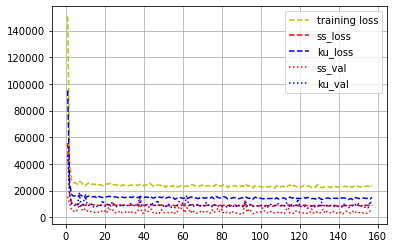

In [16]:
loss = hist.history["loss"]
ss_loss = hist.history["dense_8_loss"]
ku_loss = hist.history["dense_11_loss"]
ss_val = hist.history["val_dense_8_loss"]
ku_val = hist.history["val_dense_11_loss"]

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'y--', label="training loss")
plt.plot(epochs, ss_loss, 'r--', label="ss_loss")
plt.plot(epochs, ku_loss, 'b--', label="ku_loss")
plt.plot(epochs, ss_val, 'r:', label="ss_val")
plt.plot(epochs, ku_val, 'b:', label="ku_val")

plt.grid()
plt.legend()
plt.show()